In [791]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,accuracy_score,recall_score,precision_score, log_loss, brier_score_loss,mean_squared_error
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [956]:
rew = pd.read_csv('./reviews.csv')
lis = pd.read_csv('./listings.csv')
cal = pd.read_csv('./calendar.csv')

In [957]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

In [958]:
lis.head(100)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [959]:
#lis.info()
#lis.columns
#host_response_rate
#host_acceptance_rate

In [960]:
#lis.interaction.unique()
#lis.access.unique()
#lis.house_rules.unique()

# CONVERT to FLOAT

In [961]:
'''def dollar_to_float(df,col_list):
    for col in col_list:
        for i in range(0, df[col].shape[0]):
            if ',' in df[col][i]:
                df[col][i]=df[col][i].replace(',','')
            df[col][i] = df[col][i][1:]
        df[col] = df[col].astype('float')'''

"def dollar_to_float(df,col_list):\n    for col in col_list:\n        for i in range(0, df[col].shape[0]):\n            if ',' in df[col][i]:\n                df[col][i]=df[col][i].replace(',','')\n            df[col][i] = df[col][i][1:]\n        df[col] = df[col].astype('float')"

In [962]:
def dollar_to_float(df,col, ch):
    for i in range(0, df[col].shape[0]):
        if isinstance(df[col][i], str):
            df[col][i]=df[col][i].replace(',','')
            if ch == '$':
                df[col][i] = df[col][i][1:]
            elif ch == '%':
                df[col][i] = df[col][i][:-1]
    df[col] = df[col].astype('float')

In [963]:
#',' in lis['price']

has_price = []
for a in lis.columns:
    if 'price' in a or 'fee' in a:
        has_price.append(a)

In [964]:
has_price

['square_feet', 'price', 'weekly_price', 'monthly_price', 'cleaning_fee']

In [965]:
has_price.remove('square_feet')
has_price.remove('cleaning_fee')
has_price.remove('price')

In [966]:
has_price

['weekly_price', 'monthly_price']

In [967]:
lis.drop(columns=has_price, inplace=True, axis=1)

In [968]:
dollar_to_float(lis, 'price','$')
dollar_to_float(lis, 'cleaning_fee', '$')
dollar_to_float(lis, 'extra_people', '$')
dollar_to_float(lis, 'security_deposit', '$')
dollar_to_float(lis, 'host_acceptance_rate', '%')
dollar_to_float(lis, 'host_response_rate', '%')

In [969]:
lis['price'].isnull().mean()

0.0

In [970]:
lis['cleaning_fee'].isnull().mean()

0.3087866108786611

In [971]:
lis['cleaning_fee'].fillna((lis['cleaning_fee'].mean()), inplace=True)

In [972]:
def check_negatives(df):
    neg_list = []
    for col in df.select_dtypes(include=['float', 'int']).columns:
        for i in range(0, df[col].shape[0]):
            if df[col][i] < 0:
                if col not in neg_list:
                    neg_list.append(col)
    return neg_list
            

In [973]:
negative_list = check_negatives(lis)

In [974]:
negative_list

['longitude']

# DROP COLUMNS

## Drop ID Columns

In [975]:
has_id = []
for a in lis.columns:
    if 'id' in a:
        has_id.append(a)

In [976]:
has_id

['id', 'scrape_id', 'host_id', 'host_identity_verified']

In [977]:
has_id.remove('host_identity_verified')

In [978]:
lis.drop(axis=1, columns=has_id, inplace=True)

In [979]:
lis.head(1)

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/12147973,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


## Drop Url Columns

In [980]:
has_url = []
for a in lis.columns:
    if 'url' in a:
        has_url.append(a)

In [981]:
has_url

['listing_url',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_url',
 'host_thumbnail_url',
 'host_picture_url']

In [982]:
for i in has_url:
    print(lis[i].isnull().mean(), i)

0.0 listing_url
0.16708507670850767 thumbnail_url
0.16708507670850767 medium_url
0.0 picture_url
0.16708507670850767 xl_picture_url
0.0 host_url
0.0 host_thumbnail_url
0.0 host_picture_url


In [983]:
lis.drop(axis=1, columns=has_url, inplace=True)

In [984]:
lis.head(1)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


## Drop Host Columns

In [992]:
has_host = []
for a in lis.columns:
    if 'host' in a:
        has_host.append(a)

In [993]:
has_host

['host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count']

In [994]:
rm_from_drop_list = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
                     'host_listings_count', 'host_total_listings_count', 'host_identity_verified', 'calculated_host_listings_count']
for a in rm_from_drop_list:
    has_host.remove(a)

In [995]:
has_host

['host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_neighbourhood',
 'host_verifications',
 'host_has_profile_pic']

In [996]:
lis.drop(axis=1, columns=has_host, inplace=True)

In [997]:
lis.head(1)

,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN


## Columns With One Distinct Element

In [998]:
col_with_one_element = []
for c in lis.columns:
    if len(lis[c].unique()) == 1:
        col_with_one_element.append(c)

In [999]:
col_with_one_element

['last_scraped',
 'experiences_offered',
 'neighbourhood_group_cleansed',
 'state',
 'country_code',
 'country',
 'has_availability',
 'calendar_last_scraped',
 'requires_license',
 'license',
 'jurisdiction_names']

In [1000]:
lis.drop(columns=col_with_one_element, axis=1, inplace=True)

In [1001]:
lis.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


## Drop Unnecessary Columns

In [1002]:
lis.head(1)

,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...","Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,NaN,NaN,NaN,f,1,1,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,250.0,NaN,35.0,1,0.0,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


In [1003]:
lis.drop(columns= ['name', 'summary','space','description', 'neighborhood_overview', 'notes', 'transit', 'access', 
                   'interaction', 'house_rules', 'street', 'neighbourhood', 'city', 'neighbourhood_cleansed',
                   'smart_location', 'latitude', 'longitude', 'amenities', 'calendar_updated', 'market', 'zipcode',
                   'first_review', 'last_review'], inplace=True, axis=1)

In [1004]:
lis.head(1)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,NaN,NaN,NaN,f,1,1,f,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,250.0,NaN,35.0,1,0.0,2,1125,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN


## Drop Correlated Column

In [1012]:
lis.drop(columns='host_listings_count', inplace=True, axis=1)

# What Does Affect The Price of a Home ?

In [1013]:
def clean_data(df):
    #drop rows with missing salary columns
    df = df.dropna(subset=['price'],axis=0)
    y=df['price']
    
    df = df.drop(columns= ['price'], axis=1)
    
    #fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
    
    #dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

In [1014]:
#using the function to create X and y
X, y = clean_data(lis)

In [1015]:
X.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_t,host_identity_verified_t,is_location_exact_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_t,require_guest_phone_verification_t
0,94.989082,84.173089,1,4,1.5,2.0,3.0,858.464286,324.698212,35.000000,1,0.0,2,1125,0,0,0,0,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1,1.970908,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,100.000000,100.000000,1,2,1.0,1.0,1.0,858.464286,95.000000,10.000000,0,0.0,2,15,26,54,84,359,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
2,100.000000,88.000000,1,2,1.0,1.0,1.0,858.464286,324.698212,68.380145,1,20.0,3,45,19,46,61,319,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
3,100.000000,50.000000,1,4,1.0,1.0,2.0,858.464286,100.000000,50.000000,2,25.0,1,1125,6,16,26,98,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
4,100.000000,100.000000,1,2,1.5,1.0,2.0,858.464286,324.698212,15.000000,1,0.0,2,31,13,34,59,334,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [1016]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .03, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

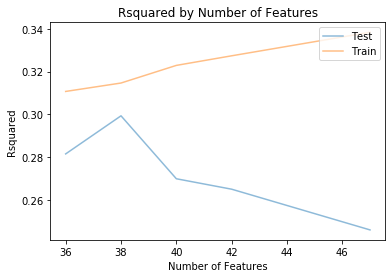

In [1017]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [700, 600, 500, 400, 300, 200, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [1018]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
33,room_type_Private room,-68.857385,68.857385
34,bed_type_Real Bed,41.062700,41.062700
4,bathrooms,35.476942,35.476942
32,property_type_House,-27.580806,27.580806
5,bedrooms,27.048699,27.048699
37,cancellation_policy_strict,-14.154825,14.154825
24,review_scores_location,13.913534,13.913534
29,host_response_time_within an hour,-12.034616,12.034616
3,accommodates,11.778382,11.778382
25,review_scores_value,-11.569490,11.569490


## Check Most Important 3 Features

In [1026]:
lis.groupby(by=['bathrooms']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
bathrooms,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,11,11,11,13,13,13,13,13,13,13,13,13,13,1,13,2,13,13,13,13,13,13,13,13,13,13,9,9,9,9,9,9,9,13,13,13,13,13,9
0.5,6,6,6,7,7,7,7,7,7,7,7,7,7,0,7,2,7,7,7,7,7,7,7,7,7,7,5,5,5,5,5,5,5,7,7,7,7,7,7
1.0,2376,2376,2376,2751,2751,2751,2751,2748,2751,2751,2741,2747,2751,44,2751,1003,2751,2751,2751,2751,2751,2751,2751,2751,2751,2751,2146,2136,2141,2139,2141,2137,2138,2751,2751,2751,2751,2751,2187
1.5,177,177,177,208,208,208,208,208,208,208,208,208,208,3,208,91,208,208,208,208,208,208,208,208,208,208,172,172,172,172,172,172,172,208,208,208,208,208,176
2.0,426,426,426,478,478,478,478,478,478,478,478,478,478,6,478,176,478,478,478,478,478,478,478,478,478,478,335,335,335,335,335,335,335,478,478,478,478,478,345
2.5,62,62,62,68,68,68,68,68,68,68,68,68,68,2,68,38,68,68,68,68,68,68,68,68,68,68,56,56,56,56,56,56,56,68,68,68,68,68,56
3.0,20,20,20,21,21,21,21,21,21,21,21,21,21,0,21,8,21,21,21,21,21,21,21,21,21,21,16,16,16,16,16,16,16,21,21,21,21,21,16
3.5,11,11,11,13,13,13,13,13,13,13,13,13,13,0,13,6,13,13,13,13,13,13,13,13,13,13,12,12,12,12,12,12,12,13,13,13,13,13,12
4.0,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [1023]:
lis.groupby(by=['room_type']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,is_location_exact,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,1870,1870,1870,2127,2127,2127,2127,2125,2127,2123,2117,2126,2127,40,2127,888,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,1641,1637,1638,1637,1638,1635,1637,2127,2127,2127,2127,2127,1672
Private room,1176,1176,1176,1378,1378,1378,1378,1377,1378,1369,1378,1370,1378,15,1378,438,1378,1378,1378,1378,1378,1378,1378,1378,1378,1378,1078,1072,1076,1075,1076,1075,1074,1378,1378,1378,1378,1378,1101
Shared room,68,68,68,80,80,80,80,80,80,79,80,80,80,1,80,16,80,80,80,80,80,80,80,80,80,80,53,53,53,53,53,53,53,80,80,80,80,80,56


In [1027]:
lis.groupby(by=['bed_type']).count()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
bed_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Airbed,37,37,37,40,40,40,40,40,40,40,40,40,40,0,40,25,40,40,40,40,40,40,40,40,40,40,29,29,29,29,29,29,29,40,40,40,40,40,29
Couch,9,9,9,10,10,10,10,10,10,10,10,10,10,1,10,1,10,10,10,10,10,10,10,10,10,10,6,6,6,6,6,6,6,10,10,10,10,10,6
Futon,42,42,42,51,51,51,51,51,51,51,51,51,51,0,51,16,51,51,51,51,51,51,51,51,51,51,48,48,48,48,48,48,48,51,51,51,51,51,49
Pull-out Sofa,28,28,28,31,31,31,31,31,31,31,31,31,31,0,31,13,31,31,31,31,31,31,31,31,31,31,27,27,27,27,27,27,26,31,31,31,31,31,27
Real Bed,2998,2998,2998,3453,3453,3453,3453,3450,3453,3453,3439,3443,3444,55,3453,1287,3453,3453,3453,3453,3453,3453,3453,3453,3453,3453,2662,2652,2657,2655,2657,2653,2655,3453,3453,3453,3453,3453,2718


# Is There A Correlation Between Review Scores Ratings and Bed_Type

In [923]:
lis.groupby(by=['bed_type'])['review_scores_rating'].count()

bed_type
Airbed             29
Couch               6
Futon              48
Pull-out Sofa      27
Real Bed         2662
Name: review_scores_rating, dtype: int64

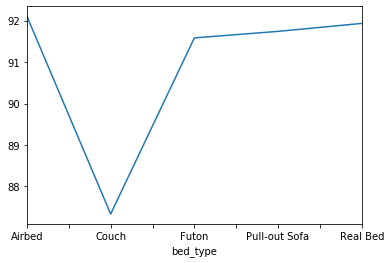

In [954]:
#lis['bed_type'].unique()
lis.groupby(by=['bed_type'])['review_scores_rating'].mean().plot()

In [925]:
lis[lis['bed_type'] == 'Couch']['review_scores_rating']

633       NaN
653      60.0
777      93.0
1291      NaN
2344      NaN
2483     98.0
2495     73.0
2551      NaN
2790    100.0
3358    100.0
Name: review_scores_rating, dtype: float64

# Do The Hosts of Homes With High Prices Respond Faster Than Others

In [928]:
lis['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'within a day',
       'a few days or more'], dtype=object)

In [930]:
lis.groupby(by = ['host_response_time'])['price'].count()

host_response_time
a few days or more      43
within a day           469
within a few hours    1218
within an hour        1384
Name: price, dtype: int64

In [931]:
lis.groupby(by = ['host_response_time'])['price'].mean()

host_response_time
a few days or more    150.627907
within a day          155.127932
within a few hours    190.050082
within an hour        160.638728
Name: price, dtype: float64

# Does The Property Type Affect The Price ?

In [955]:
lis.groupby(by=['property_type'])['price'].count()

property_type
Apartment          2612
Bed & Breakfast      41
Boat                 12
Camper/RV             1
Condominium         231
Dorm                  2
Entire Floor          4
Guesthouse            1
House               562
Loft                 39
Other                17
Townhouse            54
Villa                 6
Name: price, dtype: int64

In [935]:
lis.groupby(by = ['property_type'])['price'].mean().sort_values()

property_type
Camper/RV           60.000000
Dorm                62.500000
Entire Floor       122.000000
Bed & Breakfast    129.365854
House              131.599644
Townhouse          149.037037
Apartment          181.966692
Loft               185.410256
Villa              189.500000
Condominium        190.246753
Other              229.941176
Boat               268.833333
Guesthouse         289.000000
Name: price, dtype: float64

In [933]:
lis['property_type'].unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', nan, 'Camper/RV'], dtype=object)